In [11]:
import pickle
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

OUTPUT_PATH = "../output/output"
os.listdir(OUTPUT_PATH)

['checkpoints', 'logs', 'test_repr-model1_ch19_ep25.p']

In [12]:
data_types = ['train', 'test']
i = 0
with open(Path(OUTPUT_PATH, 'test_repr-model1_ch19_ep25.p'), 'rb') as file:
    vectors, labels = pickle.load(file)
    
print(vectors.shape, labels.shape)

(1242, 128) (1242,)


/home/jo/.anaconda3/envs/MultimediaSecurity/lib/python3.10/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


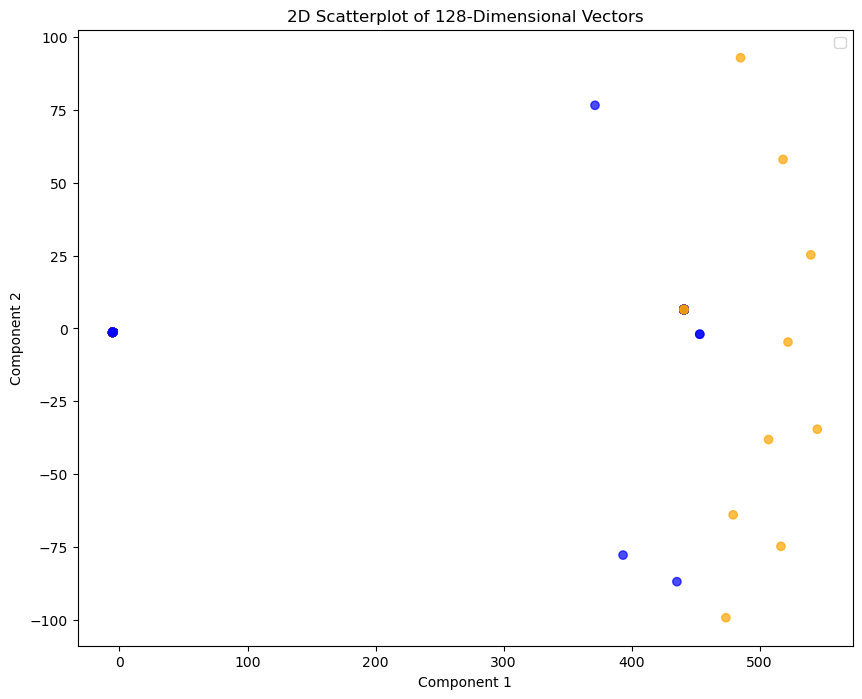

In [13]:
# Option 1: Using t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Option 2: Using PCA 
# pca = PCA(n_components=2)
# vectors_2d = pca.fit_transform(vectors)

# Step 2: Create the scatterplot
plt.figure(figsize=(10, 8))

# Color points based on labels
colors = np.array(['blue', 'orange'])
scatter = plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=colors[labels], alpha=0.7)

# Optional: Add a legend
plt.legend(handles=scatter.legend_elements()[0], labels=['Label 0', 'Label 1'])

plt.title('2D Scatterplot of 128-Dimensional Vectors')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()